In [239]:
#!pip install sklearn
#!pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier

<h1>1. Первичный анализ данных.</h1>

Для начала получим общую статистику и построим графики.

In [223]:
cities_raw = pd.read_csv('cities.csv')
companys_raw = pd.read_csv('hh_company.csv')
vacancys_raw = pd.read_csv('hh_vacancy.csv')


In [224]:
vacancys_raw.describe()
vacancys_raw


,id,area_id,area_name,employer_id,employment_id,employment_name,experience_id,experience_name,key_skills,name,published_at,salary_currency,salary_from,salary_to,schedule_id,schedule_name,specialization_id,specialization_name
0,25607531,1,Москва,1747017.0,full,Полная занятость,between3And6,От 3 до 6 лет,"PHP, Symfony, PostgreSQL, Redis, Design Patter...",Senior/Middle PHP-Developer,2018-05-06T17:43:45+0300,RUR,120000.0,170000.0,fullDay,Полный день,1,"Информационные технологии, интернет, телеком"
1,25435136,1,Москва,553714.0,project,Проектная работа,between3And6,От 3 до 6 лет,NaN,Ведущий фронтенд-разработчик,2018-05-05T14:43:01+0300,NaN,NaN,NaN,remote,Удаленная работа,1,"Информационные технологии, интернет, телеком"
2,25284500,84,Ставрополь,5402.0,full,Полная занятость,between3And6,От 3 до 6 лет,"JavaScript, HTML5, CSS3, AngularJS, Bootstrap",Frontend-разработчик,2018-05-04T09:24:18+0300,RUR,60000.0,80000.0,fullDay,Полный день,1,"Информационные технологии, интернет, телеком"
3,25641559,1,Москва,1554.0,full,Полная занятость,between1And3,От 1 года до 3 лет,"1С программирование, 1С: Бухгалтерия, 1С Управ...",Программист-консультант 1С,2018-05-06T10:49:05+0300,NaN,NaN,NaN,fullDay,Полный день,1,"Информационные технологии, интернет, телеком"
4,25527035,2,Санкт-Петербург,3289100.0,full,Полная занятость,between1And3,От 1 года до 3 лет,NaN,Менеджер по продажам,2018-05-05T16:15:16+0300,RUR,35000.0,100000.0,flexible,Гибкий график,1,"Информационные технологии, интернет, телеком"
5,25178591,1,Москва,2353123.0,full,Полная занятость,between3And6,От 3 до 6 лет,NaN,Системный аналитик,2018-05-07T00:54:39+0300,NaN,NaN,NaN,fullDay,Полный день,1,"Информационные технологии, интернет, телеком"
6,25449125,1,Москва,934019.0,full,Полная занятость,between3And6,От 3 до 6 лет,NaN,Java-разработчик,2018-05-06T11:41:28+0300,RUR,120000.0,220000.0,fullDay,Полный день,1,"Информационные технологии, интернет, телеком"
7,25459894,1,Москва,1053428.0,full,Полная занятость,between3And6,От 3 до 6 лет,"Linux, AWS, Proxmox, Vagrant, Docker, Админист...",Системный администратор (DevOps),2018-05-06T17:00:04+0300,RUR,100000.0,NaN,fullDay,Полный день,1,"Информационные технологии, интернет, телеком"
8,25041175,2,Санкт-Петербург,934019.0,full,Полная занятость,between1And3,От 1 года до 3 лет,NaN,Java разработчик (middle/senior),2018-05-05T18:43:16+0300,RUR,120000.0,220000.0,fullDay,Полный день,1,"Информационные технологии, интернет, телеком"
9,25295125,78,Самара,2618807.0,full,Полная занятость,between1And3,От 1 года до 3 лет,"Коммуникабельность, Аналитический склад ума, Н...",Менеджер по работе с корпоративными клиентами,2018-05-06T11:45:27+0300,RUR,35000.0,NaN,fullDay,Полный день,1,"Информационные технологии, интернет, телеком"


In [225]:
companys_raw


,employer_id,employer_name,employer_site,industry_id,industry_name
0,1747017.0,Колтач Солюшнс,NaN,7,"Информационные технологии, системная интеграци..."
1,553714.0,Нотамедиа,NaN,7,"Информационные технологии, системная интеграци..."
2,5402.0,НЕОЛАНТ,NaN,7,"Информационные технологии, системная интеграци..."
3,1554.0,Infosuite,NaN,7,"Информационные технологии, системная интеграци..."
4,3289100.0,Медиа Бокс,NaN,7,"Информационные технологии, системная интеграци..."
5,2353123.0,Инфотех Груп,NaN,7,"Информационные технологии, системная интеграци..."
6,934019.0,ТекФорс Инжиниринг,NaN,7,"Информационные технологии, системная интеграци..."
7,1053428.0,Roundme,NaN,7,"Информационные технологии, системная интеграци..."
8,934019.0,ТекФорс Инжиниринг,NaN,7,"Информационные технологии, системная интеграци..."
9,2618807.0,Региональный центр информационной безопасности,NaN,7,"Информационные технологии, системная интеграци..."


In [226]:
cities_raw

,Индекс,Тип региона,Регион,Тип района,Район,Тип города,Город,Тип н/п,Н/п,Код КЛАДР,...,Уровень по ФИАС,Признак центра района или региона,Код ОКАТО,Код ОКТМО,Код ИФНС,Часовой пояс,Широта,Долгота,Федеральный округ,Население
0,385200.0,Респ,Адыгея,NaN,NaN,г,Адыгейск,NaN,NaN,100000200000,...,4: город,0,79403000000,7.970300e+10,107,UTC+3,44.878372,39.190172,Южный,12689
1,385000.0,Респ,Адыгея,NaN,NaN,г,Майкоп,NaN,NaN,100000100000,...,4: город,2,79401000000,7.970100e+10,105,UTC+3,44.609827,40.100653,Южный,144055
2,649000.0,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,NaN,NaN,400000100000,...,4: город,2,84401000000,8.470100e+07,400,UTC+7,51.958268,85.960296,Сибирский,62861
3,658125.0,край,Алтайский,NaN,NaN,г,Алейск,NaN,NaN,2200000200000,...,4: город,0,1403000000,1.703000e+06,2201,UTC+7,52.492091,82.779415,Сибирский,28528
4,656000.0,край,Алтайский,NaN,NaN,г,Барнаул,NaN,NaN,2200000100000,...,4: город,2,1401000000,1.701000e+06,2200,UTC+7,53.348115,83.779836,Сибирский,635585
5,659900.0,край,Алтайский,NaN,NaN,г,Белокуриха,NaN,NaN,2200000300000,...,4: город,0,1404000000,1.704000e+09,2204,UTC+7,51.996053,84.984034,Сибирский,15072
6,659300.0,край,Алтайский,NaN,NaN,г,Бийск,NaN,NaN,2200000400000,...,4: город,0,1405000000,1.705000e+09,2204,UTC+7,52.539368,85.213885,Сибирский,203826
7,658420.0,край,Алтайский,р-н,Локтевский,г,Горняк,NaN,NaN,2202700100000,...,4: город,1,1225501000,1.625101e+06,2209,UTC+7,50.997903,81.464306,Сибирский,13040
8,659100.0,край,Алтайский,NaN,NaN,г,Заринск,NaN,NaN,2200001100000,...,4: город,0,1406000000,1.706000e+09,2208,UTC+7,53.706350,84.931470,Сибирский,47035
9,658480.0,край,Алтайский,р-н,Змеиногорский,г,Змеиногорск,NaN,NaN,2201500100000,...,4: город,1,1214501000,1.614101e+06,2209,UTC+7,51.158023,82.187248,Сибирский,10569


Построим кучу pair plot.

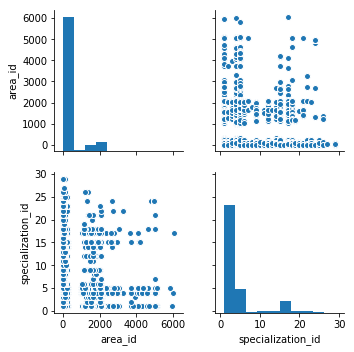

In [227]:
%config InlineBackend.figure_format = 'png' 
%matplotlib inline
sns.pairplot(vacancys_raw[['area_id', 'specialization_id']])

Графики на данном этапе говорят мало, так как еще мало численных данных. 
Видно, что очень большое количество специальностей расположено где-то около 0: это Москва и Санкт-Петербург.
Некоторых специальностей вообще нет нигде, кроме Москвы и СПБ, поэтому результаты регрессии могут быть сильно смещены в сторону показателей Москвы и СПБ.
Надо как-то уравнять распределение вакансий: либо дособрать данных, либо исключить уникальные для Москвы и СПБ, и общую модель строить без них. 

<h2>2. Очистка данных.</h2>

1. Есть столбцы, которые имеют одинаковые по сути данные. Например, Experience_id и Experience_name. Разница только в том, что первое - некоторый код, второе - человекочитаемое название. Столбцы, дублирующие данные в человекочитаемом формате надо удалить сразу. Также нужно удалить само название вакансии - так как каждая компания для одного набора навыков придумывает свой собственный вариант названия вакансии.

In [228]:
col_to_drop = ['experience_name', 'schedule_name', 'specialization_name', 'employment_name', 'area_id', 'name']
vacancys_inproc = vacancys_raw.copy().drop(col_to_drop, axis=1)
vacancys_inproc

,id,area_name,employer_id,employment_id,experience_id,key_skills,published_at,salary_currency,salary_from,salary_to,schedule_id,specialization_id
0,25607531,Москва,1747017.0,full,between3And6,"PHP, Symfony, PostgreSQL, Redis, Design Patter...",2018-05-06T17:43:45+0300,RUR,120000.0,170000.0,fullDay,1
1,25435136,Москва,553714.0,project,between3And6,NaN,2018-05-05T14:43:01+0300,NaN,NaN,NaN,remote,1
2,25284500,Ставрополь,5402.0,full,between3And6,"JavaScript, HTML5, CSS3, AngularJS, Bootstrap",2018-05-04T09:24:18+0300,RUR,60000.0,80000.0,fullDay,1
3,25641559,Москва,1554.0,full,between1And3,"1С программирование, 1С: Бухгалтерия, 1С Управ...",2018-05-06T10:49:05+0300,NaN,NaN,NaN,fullDay,1
4,25527035,Санкт-Петербург,3289100.0,full,between1And3,NaN,2018-05-05T16:15:16+0300,RUR,35000.0,100000.0,flexible,1
5,25178591,Москва,2353123.0,full,between3And6,NaN,2018-05-07T00:54:39+0300,NaN,NaN,NaN,fullDay,1
6,25449125,Москва,934019.0,full,between3And6,NaN,2018-05-06T11:41:28+0300,RUR,120000.0,220000.0,fullDay,1
7,25459894,Москва,1053428.0,full,between3And6,"Linux, AWS, Proxmox, Vagrant, Docker, Админист...",2018-05-06T17:00:04+0300,RUR,100000.0,NaN,fullDay,1
8,25041175,Санкт-Петербург,934019.0,full,between1And3,NaN,2018-05-05T18:43:16+0300,RUR,120000.0,220000.0,fullDay,1
9,25295125,Самара,2618807.0,full,between1And3,"Коммуникабельность, Аналитический склад ума, Н...",2018-05-06T11:45:27+0300,RUR,35000.0,NaN,fullDay,1


2. Посчитаем процент пустых записей в столбцах.


In [229]:
vacancys_inproc.isnull().sum() / len(vacancys_inproc) * 100

id                    0.000000
area_name             0.000000
employer_id           0.120986
employment_id         0.161315
experience_id         0.161315
key_skills           66.456621
published_at          0.000000
salary_currency      47.784443
salary_from          51.550134
salary_to            76.841256
schedule_id           0.161315
specialization_id     0.000000
dtype: float64

На основе этого можно сказать, что присутствуют столбцы, которые слишком незаполнены (например salary_to=76% и key_skills=66%), данные в которых можно считать нерепрезентативными. Уберем эти столбцы. 

Наполовину заполненные столбцы - спроный вопрос (например salary_from=51% и salary_currency=47%). Пока что оставим их, но использовать их в качестве Y - нельзя.

In [230]:
too_empty_cols = ['key_skills', 'salary_to']
vacancys_inproc = vacancys_inproc.copy().drop(too_empty_cols, axis=1)
vacancys_inproc

,id,area_name,employer_id,employment_id,experience_id,published_at,salary_currency,salary_from,schedule_id,specialization_id
0,25607531,Москва,1747017.0,full,between3And6,2018-05-06T17:43:45+0300,RUR,120000.0,fullDay,1
1,25435136,Москва,553714.0,project,between3And6,2018-05-05T14:43:01+0300,NaN,NaN,remote,1
2,25284500,Ставрополь,5402.0,full,between3And6,2018-05-04T09:24:18+0300,RUR,60000.0,fullDay,1
3,25641559,Москва,1554.0,full,between1And3,2018-05-06T10:49:05+0300,NaN,NaN,fullDay,1
4,25527035,Санкт-Петербург,3289100.0,full,between1And3,2018-05-05T16:15:16+0300,RUR,35000.0,flexible,1
5,25178591,Москва,2353123.0,full,between3And6,2018-05-07T00:54:39+0300,NaN,NaN,fullDay,1
6,25449125,Москва,934019.0,full,between3And6,2018-05-06T11:41:28+0300,RUR,120000.0,fullDay,1
7,25459894,Москва,1053428.0,full,between3And6,2018-05-06T17:00:04+0300,RUR,100000.0,fullDay,1
8,25041175,Санкт-Петербург,934019.0,full,between1And3,2018-05-05T18:43:16+0300,RUR,120000.0,fullDay,1
9,25295125,Самара,2618807.0,full,between1And3,2018-05-06T11:45:27+0300,RUR,35000.0,fullDay,1


Теперь о таблице компаний: она совсем неинтересная: в insustry_id и industry_name одинаковые для всех записей данные, а название компании соотносится с ее ID как 1:1. Поэтому таблицу можно вообще не рассматривать, если не собирать дополнительные данные.

Далее - таблица городов. 
Все коды в таблице соотносятся с индексом как 1:1, поэтому выкидываем их.



In [231]:
cities_cols_to_remove = ['Код КЛАДР', 'Код ОКАТО', 'Код ОКТМО', 'Код ИФНС', 'Код ФИАС']
cities_inproc = cities_raw.copy().drop(cities_cols_to_remove, axis=1)
cities_inproc

,Индекс,Тип региона,Регион,Тип района,Район,Тип города,Город,Тип н/п,Н/п,Уровень по ФИАС,Признак центра района или региона,Часовой пояс,Широта,Долгота,Федеральный округ,Население
0,385200.0,Респ,Адыгея,NaN,NaN,г,Адыгейск,NaN,NaN,4: город,0,UTC+3,44.878372,39.190172,Южный,12689
1,385000.0,Респ,Адыгея,NaN,NaN,г,Майкоп,NaN,NaN,4: город,2,UTC+3,44.609827,40.100653,Южный,144055
2,649000.0,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,NaN,NaN,4: город,2,UTC+7,51.958268,85.960296,Сибирский,62861
3,658125.0,край,Алтайский,NaN,NaN,г,Алейск,NaN,NaN,4: город,0,UTC+7,52.492091,82.779415,Сибирский,28528
4,656000.0,край,Алтайский,NaN,NaN,г,Барнаул,NaN,NaN,4: город,2,UTC+7,53.348115,83.779836,Сибирский,635585
5,659900.0,край,Алтайский,NaN,NaN,г,Белокуриха,NaN,NaN,4: город,0,UTC+7,51.996053,84.984034,Сибирский,15072
6,659300.0,край,Алтайский,NaN,NaN,г,Бийск,NaN,NaN,4: город,0,UTC+7,52.539368,85.213885,Сибирский,203826
7,658420.0,край,Алтайский,р-н,Локтевский,г,Горняк,NaN,NaN,4: город,1,UTC+7,50.997903,81.464306,Сибирский,13040
8,659100.0,край,Алтайский,NaN,NaN,г,Заринск,NaN,NaN,4: город,0,UTC+7,53.706350,84.931470,Сибирский,47035
9,658480.0,край,Алтайский,р-н,Змеиногорский,г,Змеиногорск,NaN,NaN,4: город,1,UTC+7,51.158023,82.187248,Сибирский,10569


Также посчитаем процент пустоты столбцов.

In [232]:
cities_inproc.isnull().sum() / len(cities_inproc) * 100

Индекс                                0.359712
Тип региона                           0.000000
Регион                                0.000000
Тип района                           43.435252
Район                                43.435252
Тип города                            0.359712
Город                                 0.359712
Тип н/п                              99.820144
Н/п                                  99.820144
Уровень по ФИАС                       0.000000
Признак центра района или региона     0.000000
Часовой пояс                          0.000000
Широта                                0.000000
Долгота                               0.000000
Федеральный округ                     0.000000
Население                             0.000000
dtype: float64

Здесь уже удалим и те, которы пусты на 99%, и те, которые пусты на 43%, так как информация о районах не слишком актуальна для небольших городов и заполнить чем-то усредненным не получится.

Кроме того, в столбце "Уровень по ФИАС" содержится один вариант значения.

In [233]:
too_empty_cols_sities = ['Тип района','Район','Тип н/п','Н/п']
cities_inproc = cities_inproc.copy().drop(too_empty_cols_sities, axis=1)
cities_inproc

,Индекс,Тип региона,Регион,Тип города,Город,Уровень по ФИАС,Признак центра района или региона,Часовой пояс,Широта,Долгота,Федеральный округ,Население
0,385200.0,Респ,Адыгея,г,Адыгейск,4: город,0,UTC+3,44.878372,39.190172,Южный,12689
1,385000.0,Респ,Адыгея,г,Майкоп,4: город,2,UTC+3,44.609827,40.100653,Южный,144055
2,649000.0,Респ,Алтай,г,Горно-Алтайск,4: город,2,UTC+7,51.958268,85.960296,Сибирский,62861
3,658125.0,край,Алтайский,г,Алейск,4: город,0,UTC+7,52.492091,82.779415,Сибирский,28528
4,656000.0,край,Алтайский,г,Барнаул,4: город,2,UTC+7,53.348115,83.779836,Сибирский,635585
5,659900.0,край,Алтайский,г,Белокуриха,4: город,0,UTC+7,51.996053,84.984034,Сибирский,15072
6,659300.0,край,Алтайский,г,Бийск,4: город,0,UTC+7,52.539368,85.213885,Сибирский,203826
7,658420.0,край,Алтайский,г,Горняк,4: город,1,UTC+7,50.997903,81.464306,Сибирский,13040
8,659100.0,край,Алтайский,г,Заринск,4: город,0,UTC+7,53.706350,84.931470,Сибирский,47035
9,658480.0,край,Алтайский,г,Змеиногорск,4: город,1,UTC+7,51.158023,82.187248,Сибирский,10569


Можно решить, что в качестве выходного вектора Y будет выступать требуемый опыт.

<h1>3. Подготовка данных.</h1>

В данной части строковые столбцы будут представлены в виде числовых или логических категорий, а также будет произведено объединение таблиц вакансий и городов.

Начнем с факторизации.

In [234]:
#Выполняет факторизацию методом разбиения на несколько бинарных столбцов (0,1).
def factorise_split(df, cols_to_fact):
    df_copy = df.copy(deep=True)
    for col_name in cols_to_fact:
        col = df_copy[col_name]
        labels, uniques = pd.factorize(col)
        df_copy = df_copy.drop(col_name, axis=1)
        # Для каждого значения выделим колонку и заполним ее 0 и 1 и вставим в конец таблицы.
        for uniq in uniques:
            new_col_name = col_name + '-' + uniq
            new_col_data = list( 1 if cell==uniq else 0 for cell in col)
            df_copy.insert(column=new_col_name, value=new_col_data, loc=len(df_copy.columns))
    return df_copy

def factorise_incol(df, cols_to_fact):
    df_copy = df.copy(deep=True)
    for col_name in cols_to_fact:
        col = df_copy[col_name]
        labels, uniques = pd.factorize(col)
        df_copy = df_copy.drop(col_name, axis=1)
        df_copy.insert(column=col_name, value=labels, loc=len(df_copy.columns))
    return df_copy

In [235]:
cities_factorised = factorise_split(cities_inproc, ['Тип региона','Регион','Тип города','Уровень по ФИАС','Часовой пояс','Федеральный округ'])
cities_factorised.describe()

,Индекс,Признак центра района или региона,Широта,Долгота,Тип региона-Респ,Тип региона-край,Тип региона-обл,Тип региона-Аобл,Тип региона-г,Тип региона-АО,...,Часовой пояс-UTC+11,Часовой пояс-UTC+6,Федеральный округ-Южный,Федеральный округ-Сибирский,Федеральный округ-Дальневосточный,Федеральный округ-Северо-Западный,Федеральный округ-Приволжский,Федеральный округ-Центральный,Федеральный округ-Северо-Кавказский,Федеральный округ-Уральский
count,1108.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,...,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000
mean,411242.165162,0.645683,54.548004,54.878811,0.154676,0.123201,0.683453,0.001799,0.003597,0.025180,...,0.015288,0.005396,0.087230,0.116906,0.059353,0.131295,0.178957,0.272482,0.050360,0.103417
std,189985.082274,0.613675,5.220261,27.914356,0.361758,0.328816,0.465338,0.042390,0.059895,0.156742,...,0.122750,0.073290,0.282299,0.321453,0.236390,0.337875,0.383489,0.445437,0.218784,0.304640
min,101000.000000,0.000000,42.058935,19.914191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238040.000000,0.000000,52.123903,37.860089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,403225.000000,1.000000,55.118371,43.962259,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,622270.000000,1.000000,57.127968,60.134957,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,694920.000000,3.000000,69.701805,177.501575,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [236]:
vacansions_factorised = factorise_split(vacancys_inproc, ['employment_id','salary_currency','schedule_id'])
vacansions_factorised.describe()

,id,employer_id,salary_from,specialization_id,employment_id-full,employment_id-project,employment_id-part,employment_id-probation,salary_currency-RUR,salary_currency-USD,salary_currency-EUR,salary_currency-UAH,schedule_id-fullDay,schedule_id-remote,schedule_id-flexible,schedule_id-shift,schedule_id-flyInFlyOut
count,1.983700e+04,1.981300e+04,9611.000000,19837.000000,19837.000000,19837.000000,19837.000000,19837.000000,19837.000000,19837.000000,19837.000000,19837.000000,19837.000000,19837.000000,19837.000000,19837.000000,19837.000000
mean,2.470162e+07,7.170457e+05,52810.308084,3.685991,0.953068,0.004386,0.035943,0.004991,0.516963,0.003277,0.001613,0.000302,0.777739,0.099662,0.075515,0.045168,0.000302
std,1.422869e+06,8.764121e+05,36177.993558,5.161444,0.211500,0.066081,0.186153,0.070470,0.499725,0.057150,0.040133,0.017389,0.415776,0.299557,0.264228,0.207678,0.017389
min,7.160726e+06,1.900000e+01,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.459000e+07,4.186200e+04,30000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.524246e+07,1.971350e+05,43000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.548151e+07,1.122462e+06,70000.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.568463e+07,3.391409e+06,300000.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Объединим подготовленные таблицы по ID компании.


In [237]:
cities_factorised=cities_factorised.rename(index=str, columns={"Город": "area_name"})

In [241]:
#Объединение, аналогичное INNER JOIN в SQL.
prepared_table = pd.merge(vacansions_factorised, cities_factorised, how='inner', on=['area_name'])
#prepared_table = pd.concat([vacansions_factorised, cities_factorised], join='inner', axis=1, join_axes=[vacansions_factorised['area_id']])
prepared_table

,id,area_name,employer_id,experience_id,published_at,salary_from,specialization_id,employment_id-full,employment_id-project,employment_id-part,...,Часовой пояс-UTC+11,Часовой пояс-UTC+6,Федеральный округ-Южный,Федеральный округ-Сибирский,Федеральный округ-Дальневосточный,Федеральный округ-Северо-Западный,Федеральный округ-Приволжский,Федеральный округ-Центральный,Федеральный округ-Северо-Кавказский,Федеральный округ-Уральский
0,25284500,Ставрополь,5402.0,between3And6,2018-05-04T09:24:18+0300,60000.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,25284499,Ставрополь,5402.0,between3And6,2018-05-04T09:23:51+0300,60000.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,24978887,Ставрополь,2680908.0,between1And3,2018-04-18T17:11:23+0300,20000.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,25337123,Ставрополь,2680908.0,noExperience,2018-04-11T11:17:27+0300,20000.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,24856835,Ставрополь,2923968.0,noExperience,2018-04-21T12:45:47+0300,NaN,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,24927861,Ставрополь,78638.0,noExperience,2018-05-01T06:07:45+0300,80000.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,25451455,Ставрополь,1785145.0,noExperience,2018-04-18T12:59:00+0300,20000.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,25499514,Ставрополь,1732758.0,between1And3,2018-05-05T09:07:41+0300,25000.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,23502223,Ставрополь,3113785.0,between1And3,2018-04-26T16:39:45+0300,30000.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,25566320,Ставрополь,766022.0,between3And6,2018-05-04T15:29:18+0300,25000.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


Затем факторизуем оставшиеся столбцы.

Попробовал факторизовать как внутри столбца, так и с разделением, результат примерно одинаковый. Но чем меньше столбцов, тем быстрее.

Опустим время размещения вакансии.

In [242]:
prepared_table = factorise_incol(prepared_table, ['area_name'])
prepared_table = factorise_incol(prepared_table, ['experience_id'])
prepared_table = prepared_table.drop('published_at', axis=1)


Затем попытаемся заполнить пустые столбцы. 
Если столбец нижнего уровня зарплат дополнить средними значениями, то модель получается очень плохой: коэфициент становится отрицательным. Эффективнее оказалось удалить строки с пустыми значениями.

В столбце населения найдены несколько строчек с некорректными данными, и одна пустая строчка. Заполним их любыми значениями, так как таких срочек очень мало.

In [243]:
#salary_mean = prepared_table['salary_from'].mean()
#prepared_table['salary_from'] = prepared_table['salary_from'].fillna(salary_mean)
prepared_table['Население'] = prepared_table['Население'].replace('96[3]', 10000)
prepared_table['Население'] = prepared_table['Население'].fillna(10000)



In [244]:
prepared_table = prepared_table.dropna()
prepared_table

,id,employer_id,salary_from,specialization_id,employment_id-full,employment_id-project,employment_id-part,employment_id-probation,salary_currency-RUR,salary_currency-USD,...,Федеральный округ-Южный,Федеральный округ-Сибирский,Федеральный округ-Дальневосточный,Федеральный округ-Северо-Западный,Федеральный округ-Приволжский,Федеральный округ-Центральный,Федеральный округ-Северо-Кавказский,Федеральный округ-Уральский,area_name,experience_id
0,25284500,5402.0,60000.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,25284499,5402.0,60000.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,24978887,2680908.0,20000.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,25337123,2680908.0,20000.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2
5,24927861,78638.0,80000.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2
6,25451455,1785145.0,20000.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2
7,25499514,1732758.0,25000.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
8,23502223,3113785.0,30000.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
9,25566320,766022.0,25000.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
12,25572620,1411663.0,23000.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


<h1>4. Обучение и оценка качества</h1>

In [245]:
def adjusted_r2_score(test_y, test_X, predict_y):
    '''Коэффициент детерминации, скорректированный на число признаков.'''
    n=test_X.shape[0]       # количество наблюдений
    p=test_X.shape[1] - 1   # количество признаков, включенных в модель
    r2 = r2_score(test_y, predict_y)
    adj_r2 = 1 - (1 - r2) * ((n - 1)/(n-p-1))
    return adj_r2

Для обучения и тестирования модели в цикле применяется случайное разбиение на тестовую и обучающую подвыборки.

Затем выполняется построение модели. 
Поскольку в качестве Y выбран требуемый опыт работы, который содержит всего 4 значения, целесообразно использовать классификацию.
Для этого выбран довольно мощный механизм - GradientBoostingClassifier, который обучается не очень быстро, но дает хорошие результаты. 
В среднем, этот классификатор выдает качество от 0.6 до 0.8.

Попробовал применить регрессию вместо классификатора - индекс r2 был на уровне 0.3

In [247]:
res_df = pd.DataFrame(data={'train_r2': [], 'test_r2': [], 'test_adj_r2': []})
for i in range(5):
    
    # Разделение на обучающую и тестовую выборку.
    prepared_table = prepared_table.sample(frac=0.99999, random_state=random.randint(1,10000))
    length = len(prepared_table)
    df_vacancy_test = prepared_table[int(2*length/3):]
    df_vacancy_train = prepared_table[:int(2*length/3)]
    
    # Векторы X,Y для обучающей выборки.
    train_y = df_vacancy_train['experience_id']
    col_x = list(prepared_table.columns)
    col_x.remove('experience_id')
    train_x = df_vacancy_train[col_x]
    
        # Векторы X,Y для тестовой выборки.
    test_y = df_vacancy_test['experience_id']
    col_x_test = list(prepared_table.columns)
    col_x_test.remove('experience_id')
    test_x = df_vacancy_test[col_x_test]
    
    
    # Построение модели.
    #reg = linear_model.LinearRegression()
    #reg.fit(train_x, train_y)

    #train_r2 = r2_score(train_y, reg.predict(train_x))
    #train_r2

    #test_r2 = r2_score(test_y, reg.predict(test_x))
    #test_r2

    # Скорректированная точность на тестовой выборке.
    #test_adj_r2 = adjusted_r2_score(test_y, test_x, reg.predict(test_x))
    #test_adj_r2
    
    classif = GradientBoostingClassifier(n_estimators=1000);
    classif.fit(train_x, train_y)
    
    train_r2 = classif.score(train_x,train_y)
    test_r2 = classif.score(test_x,test_y)
    test_adj_r2 = 0
    
    
    res_df = res_df.append({'train_r2':train_r2 , 'test_r2':test_r2, 'test_adj_r2':test_adj_r2}, ignore_index=True)
res_df

,test_adj_r2,test_r2,train_r2
0,0.0,0.769380,0.984008
1,0.0,0.769864,0.986915
2,0.0,0.755329,0.986673
3,0.0,0.776163,0.986431
4,0.0,0.766473,0.983281


Пример результата регрессии, если Y - нижняя планка з\п.
Получилось довольно небольшая точность - около 0.2.
Возможно, стоило разбить з\п на классы и применить классификатор тут.

In [249]:
res_df = pd.DataFrame(data={'train_r2': [], 'test_r2': [], 'test_adj_r2': []})
for i in range(5):
    
    # Разделение на обучающую и тестовую выборку.
    prepared_table = prepared_table.sample(frac=0.99999, random_state=random.randint(1,10000))
    length = len(prepared_table)
    df_vacancy_test = prepared_table[int(2*length/3):]
    df_vacancy_train = prepared_table[:int(2*length/3)]
    
    # Векторы X,Y для обучающей выборки.
    train_y = df_vacancy_train['salary_from']
    col_x = list(prepared_table.columns)
    col_x.remove('salary_from')
    train_x = df_vacancy_train[col_x]
    
        # Векторы X,Y для тестовой выборки.
    test_y = df_vacancy_test['salary_from']
    col_x_test = list(prepared_table.columns)
    col_x_test.remove('salary_from')
    test_x = df_vacancy_test[col_x_test]
    
    
    # Построение модели.
    reg = linear_model.LinearRegression()
    reg.fit(train_x, train_y)

    train_r2 = r2_score(train_y, reg.predict(train_x))
    train_r2

    test_r2 = r2_score(test_y, reg.predict(test_x))
    test_r2

    #Скорректированная точность на тестовой выборке.
    test_adj_r2 = adjusted_r2_score(test_y, test_x, reg.predict(test_x))
    test_adj_r2
    
    #classif = GradientBoostingClassifier(n_estimators=1000);
    #classif.fit(train_x, train_y)
    
    #train_r2 = classif.score(train_x,train_y)
    #test_r2 = classif.score(test_x,test_y)
    #test_adj_r2 = 0
    
    
    res_df = res_df.append({'train_r2':train_r2 , 'test_r2':test_r2, 'test_adj_r2':test_adj_r2}, ignore_index=True)
res_df

,test_adj_r2,test_r2,train_r2
0,0.205127,0.257913,0.279373
1,0.210391,0.262828,0.278653
2,0.188184,0.242095,0.286795
3,0.187336,0.241304,0.286407
4,0.217801,0.269746,0.273923
